In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel as C ,WhiteKernel)
#np.random.seed(1)

/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


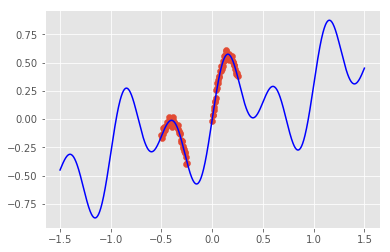

In [3]:
N=100
rng = np.random.RandomState()

def generate_toy(data_size=N, noise_std=.02):
    def f(x):
        return (0.3*x + rng.normal(0, noise_std, size=x.shape)
                + 0.3*np.sin(2*np.pi*x + rng.normal(0, noise_std, size=x.shape))
                + 0.3*np.sin(4*np.pi*x + rng.normal(0, noise_std, size=x.shape)))

    data_x = np.concatenate([np.linspace(-0.5, -0.25, data_size // 2), 
                           np.linspace(0.0, 0.25, data_size // 2)]).reshape(-1, 1)
    #data_x = np.linspace(-0.1, 0.5, data_size )[:, np.newaxis]
                           
    
    

    data_y = f(data_x)
    return data_x, data_y

# The function
xf=np.linspace(-1.5,1.5,1000)
yf=0.3*xf + 0.3*np.sin(2*np.pi*xf ) + 0.3*np.sin(4*np.pi*xf)

x_train, y_train=generate_toy()

plt.plot(xf,yf, 'b')
plt.scatter(x_train, y_train)


In [4]:
kernel=C(1., (1e-3, 1e3)) * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0))+ WhiteKernel(noise_level=1.)+C(1., (1e-3, 1e3))* RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

In [5]:
# estimating the best values of the parameters of the covariance function using ML
gp = gaussian_process.GaussianProcessRegressor(alpha=1e-10,kernel=kernel,n_restarts_optimizer=10)
gp.fit(x_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * ExpSineSquared(length_scale=1, periodicity=3) + WhiteKernel(noise_level=1) + 1**2 * RBF(length_scale=1),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [6]:
gp.kernel_

0.0316**2 * ExpSineSquared(length_scale=0.115, periodicity=10) + WhiteKernel(noise_level=0.000399) + 0.479**2 * RBF(length_scale=0.182)

In [7]:
x_pred = np.linspace(-1., 1., 500).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

Text(0,0.5,'y')

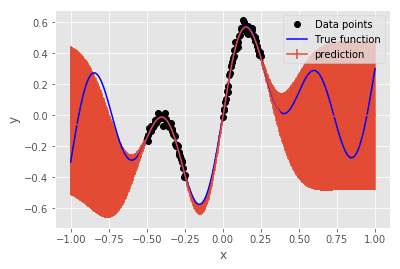

In [8]:
plt.errorbar(x_pred, y_pred, yerr=sigma, capsize=0)
#plt.fill(np.concatenate([x_pred, x_pred[::-1]]), np.concatenate([y_pred - 1.9600 * sigma,
 #                       (y_pred + 1.9600 * sigma)[::-1]]),
 #        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.plot(x_train, y_train, "ko")
plt.plot(x_pred, 0.3*x_pred + 0.3*np.sin(2*np.pi*x_pred ) + 0.3*np.sin(4*np.pi*x_pred)
, "b")
plt.legend(['Data points','True function','prediction'])
plt.xlabel('x')
plt.ylabel('y')
